# write a program to use unsupervised learning on mall_custormer dataset
# K-means

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Reading data set
data_set = pd.read_csv('Mall_Customers.csv')
data_set.head()
data_set.info()

data_set_sf = data_set.drop('Gender',axis=1)
data_set_sf = data_set_sf.drop('CustomerID',axis=1)
data_set_sf

# Training Data set 
kmeans_model = KMeans()
kmeans_model.fit(data_set_sf)
formed_clusters = kmeans_model.predict(data_set_sf)
formed_clusters


data_to_plot = data_set.copy()
data_to_plot['Clusters'] = formed_clusters
silhouette_score(data_set_sf,kmeans_model.labels_)
kmeans_model.predict(data_set_sf)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


array([7, 4, 6, 4, 7, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 7, 4, 7, 4, 7, 4,
       6, 4, 6, 4, 7, 4, 7, 4, 6, 4, 6, 4, 6, 4, 6, 4, 7, 4, 1, 4, 7, 4,
       7, 4, 1, 2, 7, 7, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 0, 3, 0, 3,
       2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5])

# Silhouette Method

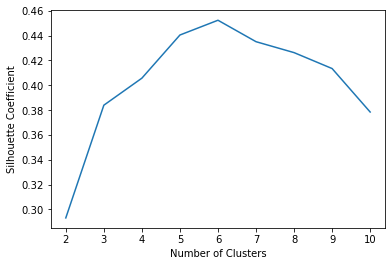

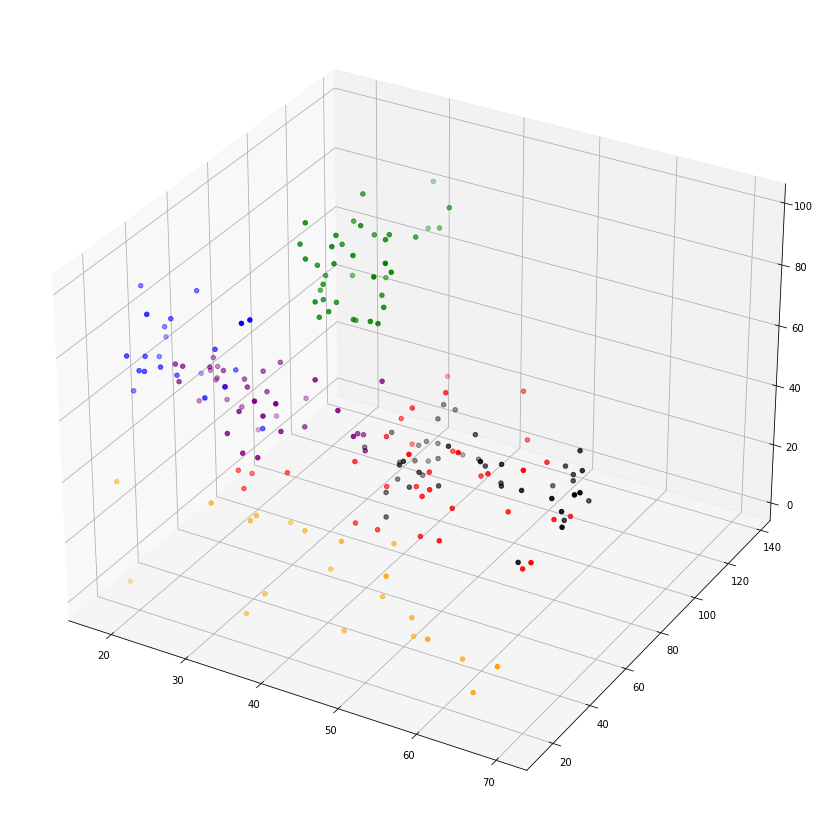

In [11]:
# Finding silhouette score for different k values
sf = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_set_sf)
    score = silhouette_score(data_set_sf,kmeans.labels_)
    sf.append(score)
sf

# Plotting silhoutte score vs different k values
plt.plot(range(2, 11), sf)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# Plotting scatter plot for k value 6
ksf = KMeans(n_clusters=6)
predicted_clusters_ksf = ksf.fit_predict(data_set_sf)
ksf_data = data_set_sf
ksf_data['Cluster']=predicted_clusters_ksf
ksf_data

c0_ksf = ksf_data[ksf_data.Cluster==0]
c1_ksf = ksf_data[ksf_data.Cluster==1]
c2_ksf = ksf_data[ksf_data.Cluster==2]
c3_ksf = ksf_data[ksf_data.Cluster==3]
c4_ksf = ksf_data[ksf_data.Cluster==4]
c5_ksf = ksf_data[ksf_data.Cluster==5]

plt.figure(figsize=(15,15))
ax = plt.axes(projection ='3d')
ax.scatter(c0_ksf['Age'],c0_ksf['Annual Income (k$)'],c0_ksf['Spending Score (1-100)'],color='r')
ax.scatter(c1_ksf['Age'],c1_ksf['Annual Income (k$)'],c1_ksf['Spending Score (1-100)'],color='b')
ax.scatter(c2_ksf['Age'],c2_ksf['Annual Income (k$)'],c2_ksf['Spending Score (1-100)'],color='g')
ax.scatter(c3_ksf['Age'],c3_ksf['Annual Income (k$)'],c3_ksf['Spending Score (1-100)'],color='orange')
ax.scatter(c4_ksf['Age'],c4_ksf['Annual Income (k$)'],c4_ksf['Spending Score (1-100)'],color='k')
ax.scatter(c5_ksf['Age'],c5_ksf['Annual Income (k$)'],c5_ksf['Spending Score (1-100)'],color='purple')
plt.show()


# Elbow Method

C:\Users\ABHISHEK CHAUHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


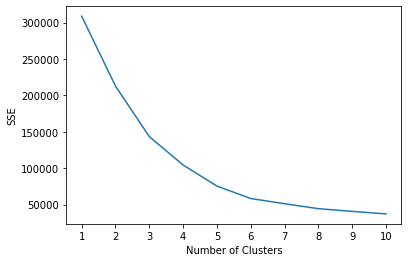

In [12]:
# Formatting data set
data_set_eb5 = data_set.drop('Gender',axis=1)
data_set_eb5 = data_set_eb5.drop('CustomerID',axis=1)
data_set_eb5


# Finding appropriate k value
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_set_eb5)
    sse.append(kmeans.inertia_)
    
sse

#plotting graph for 
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()




$ for : k = 5 $

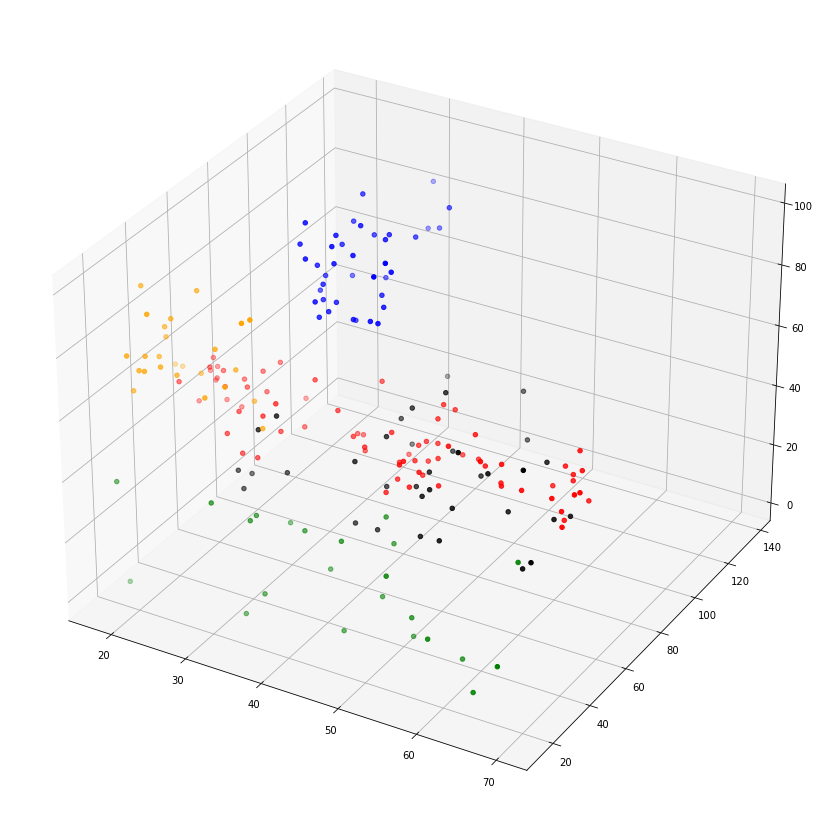

In [13]:
#Training model for k=5
kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(data_set_eb5)
formed_clusters_for_5 = kmeans_model.fit_predict(data_set_eb5)
formed_clusters_for_5
data_set_eb5['Cluster'] = formed_clusters_for_5
data_set_eb5


c0_keb5 = data_set_eb5[data_set_eb5.Cluster==0]
c1_keb5 = data_set_eb5[data_set_eb5.Cluster==1]
c2_keb5 = data_set_eb5[data_set_eb5.Cluster==2]
c3_keb5 = data_set_eb5[data_set_eb5.Cluster==3]
c4_keb5 = data_set_eb5[data_set_eb5.Cluster==4]


plt.figure(figsize=(15,15))
bx = plt.axes(projection ='3d')
bx.scatter(c0_keb5['Age'],c0_keb5['Annual Income (k$)'],c0_keb5['Spending Score (1-100)'],color='r')
bx.scatter(c1_keb5['Age'],c1_keb5['Annual Income (k$)'],c1_keb5['Spending Score (1-100)'],color='b')
bx.scatter(c2_keb5['Age'],c2_keb5['Annual Income (k$)'],c2_keb5['Spending Score (1-100)'],color='g')
bx.scatter(c3_keb5['Age'],c3_keb5['Annual Income (k$)'],c3_keb5['Spending Score (1-100)'],color='orange')
bx.scatter(c4_keb5['Age'],c4_keb5['Annual Income (k$)'],c4_keb5['Spending Score (1-100)'],color='k')
plt.show()

$for:k=4$

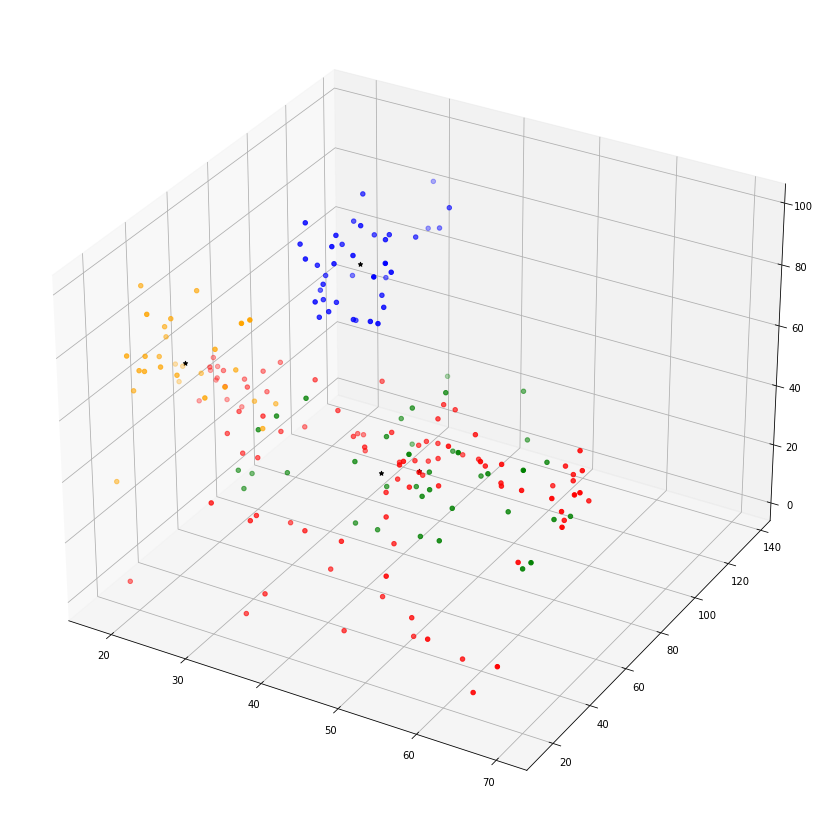

In [14]:
# Training K means model for k=4
data_set_eb4 = data_set.drop('Gender',axis=1)
data_set_eb4 = data_set_eb4.drop('CustomerID',axis=1)
data_set_eb4

kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(data_set_eb4)
cluster_centereb4 = kmeans_model.cluster_centers_
cluster_centereb4

formed_clusters_for_4 = kmeans_model.fit_predict(data_set_eb4)
formed_clusters_for_4

data_set_eb4['Cluster'] = formed_clusters_for_4
data_set_eb4

c0_keb4 = data_set_eb4[data_set_eb4.Cluster==0]
c1_keb4 = data_set_eb4[data_set_eb4.Cluster==1]
c2_keb4 = data_set_eb4[data_set_eb4.Cluster==2]
c3_keb4 = data_set_eb4[data_set_eb4.Cluster==3]

plt.figure(figsize=(15,15))
cx = plt.axes(projection ='3d')
cx.scatter(c0_keb4['Age'],c0_keb4['Annual Income (k$)'],c0_keb4['Spending Score (1-100)'],color='r')
cx.scatter(cluster_centereb4[0][0],cluster_centereb4[0][1],cluster_centereb4[0][2],marker='*',color='k')
cx.scatter(c1_keb4['Age'],c1_keb4['Annual Income (k$)'],c1_keb4['Spending Score (1-100)'],color='b')
cx.scatter(cluster_centereb4[1][0],cluster_centereb4[1][1],cluster_centereb4[1][2],marker='*',color='k')
cx.scatter(c2_keb4['Age'],c2_keb4['Annual Income (k$)'],c2_keb4['Spending Score (1-100)'],color='g')
cx.scatter(cluster_centereb4[2][0],cluster_centereb4[2][1],cluster_centereb4[2][2],marker='*',color='k')
cx.scatter(c3_keb4['Age'],c3_keb4['Annual Income (k$)'],c3_keb4['Spending Score (1-100)'],color='orange')
cx.scatter(cluster_centereb4[3][0],cluster_centereb4[3][1],cluster_centereb4[3][2],marker='*',color='k')
plt.show()

# K means  ( Annual Income vs Spending Score)

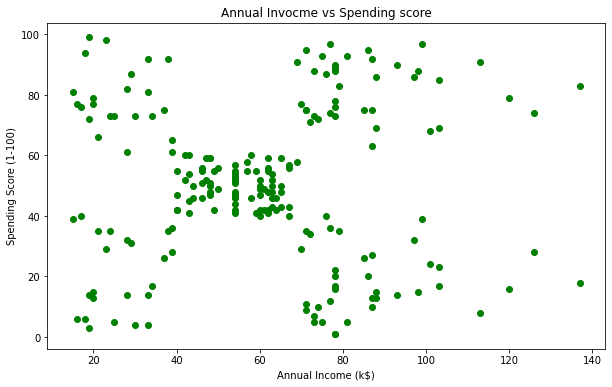

[1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1
 5 1 5 3 5 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 6 3 3 6 3 6 3 3 6 6 3 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 4 2 4 6 4 2 4 2 4 6 4 2 4 2 4 2 4 2 4 6 4 2 4 6 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 7 4 7 4 7
 4 7 0 7 0 7 0 7 0 7 0 7 0 7 0]
25355.490610835586


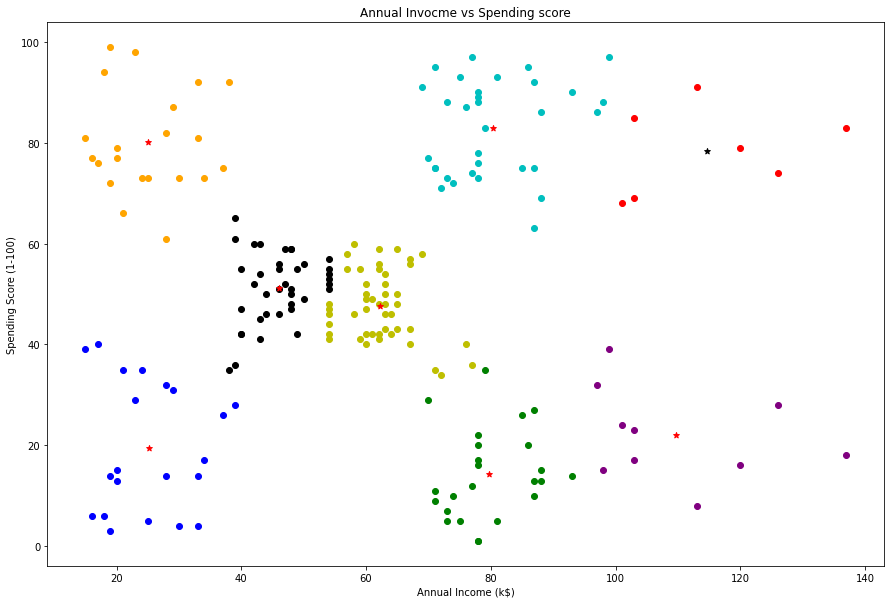

In [15]:
x = data_set.iloc[:,3:5]
x

plt.figure(figsize=(10,6,))
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],color='green')
plt.title('Annual Invocme vs Spending score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


kmeans_model = KMeans()
predicted_clusters =kmeans_model.fit_predict(x)
print(predicted_clusters)
print(kmeans_model.inertia_)
x['Cluster']=predicted_clusters
x

cluster_center = kmeans_model.cluster_centers_
cluster_center

c0 = x[x.Cluster==0]
c1 = x[x.Cluster==1]
c2 = x[x.Cluster==2]
c3 = x[x.Cluster==3]
c4 = x[x.Cluster==4]
c5 = x[x.Cluster==5]
c6 = x[x.Cluster==6]
c7 = x[x.Cluster==7]

plt.figure(figsize=(15,10,))
plt.scatter(c0['Annual Income (k$)'],c0['Spending Score (1-100)'],color = 'red')
plt.scatter(cluster_center[0][0],cluster_center[0][1],color='k',marker='*',)
plt.scatter(c1['Annual Income (k$)'],c1['Spending Score (1-100)'],color = 'blue')
plt.scatter(cluster_center[1][0],cluster_center[1][1],color='r',marker='*',)
plt.scatter(c2['Annual Income (k$)'],c2['Spending Score (1-100)'],color = 'green')
plt.scatter(cluster_center[2][0],cluster_center[2][1],color='r',marker='*',)
plt.scatter(c3['Annual Income (k$)'],c3['Spending Score (1-100)'],color = 'k')
plt.scatter(cluster_center[3][0],cluster_center[3][1],color='r',marker='*',)
plt.scatter(c4['Annual Income (k$)'],c4['Spending Score (1-100)'],color = 'c')
plt.scatter(cluster_center[4][0],cluster_center[4][1],color='r',marker='*',)
plt.scatter(c5['Annual Income (k$)'],c5['Spending Score (1-100)'],color = 'orange')
plt.scatter(cluster_center[5][0],cluster_center[5][1],color='r',marker='*',)
plt.scatter(c6['Annual Income (k$)'],c6['Spending Score (1-100)'],color = 'y')
plt.scatter(cluster_center[6][0],cluster_center[6][1],color='r',marker='*',)
plt.scatter(c7['Annual Income (k$)'],c7['Spending Score (1-100)'],color = 'purple')
plt.scatter(cluster_center[7][0],cluster_center[7][1],color='r',marker='*',)


plt.title('Annual Invocme vs Spending score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

$ Finding ,k: value-using- Elbow -method$

C:\Users\ABHISHEK CHAUHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30259.657207285458, 25061.304119069322, 21818.11458845217, 19657.783608703947]


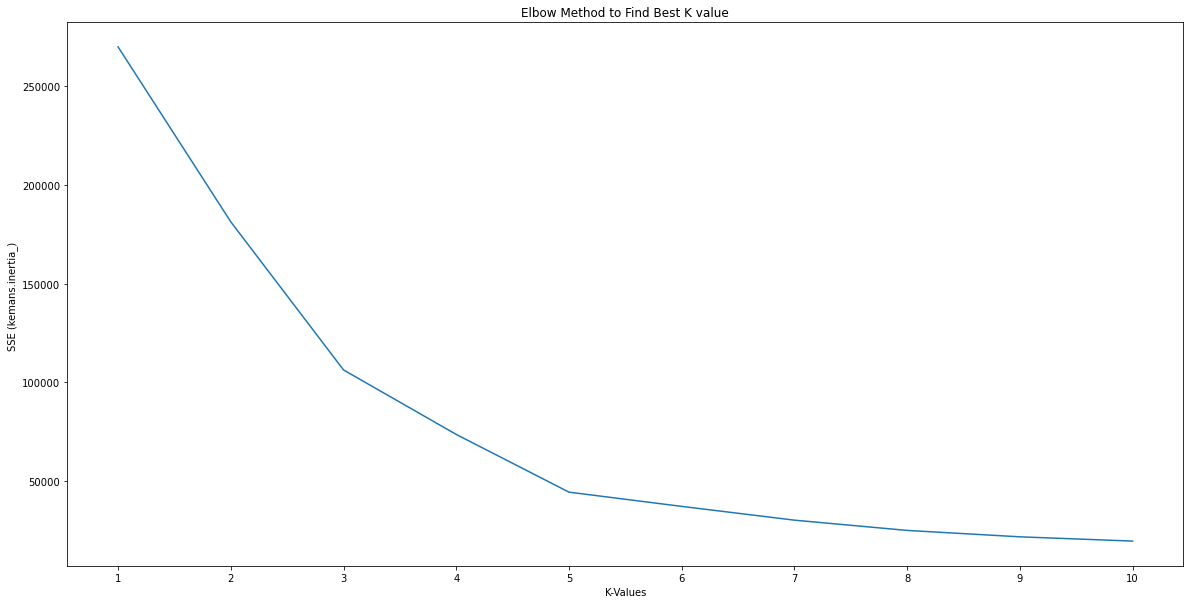

In [16]:
y = data_set.iloc[:,3:5]
y


sse = []
for k in range(1,11):
    km = KMeans(n_clusters=k)
    km.fit(y)
    sse.append(km.inertia_)
    
print(sse)
k_values = range(1,11)
plt.figure(figsize=(20,10))
plt.plot(k_values,sse)
plt.xticks(k_values)
plt.title('Elbow Method to Find Best K value')
plt.xlabel('K-Values')
plt.ylabel('SSE (kemans.inertia_) ')
plt.show()



$for:k=5$

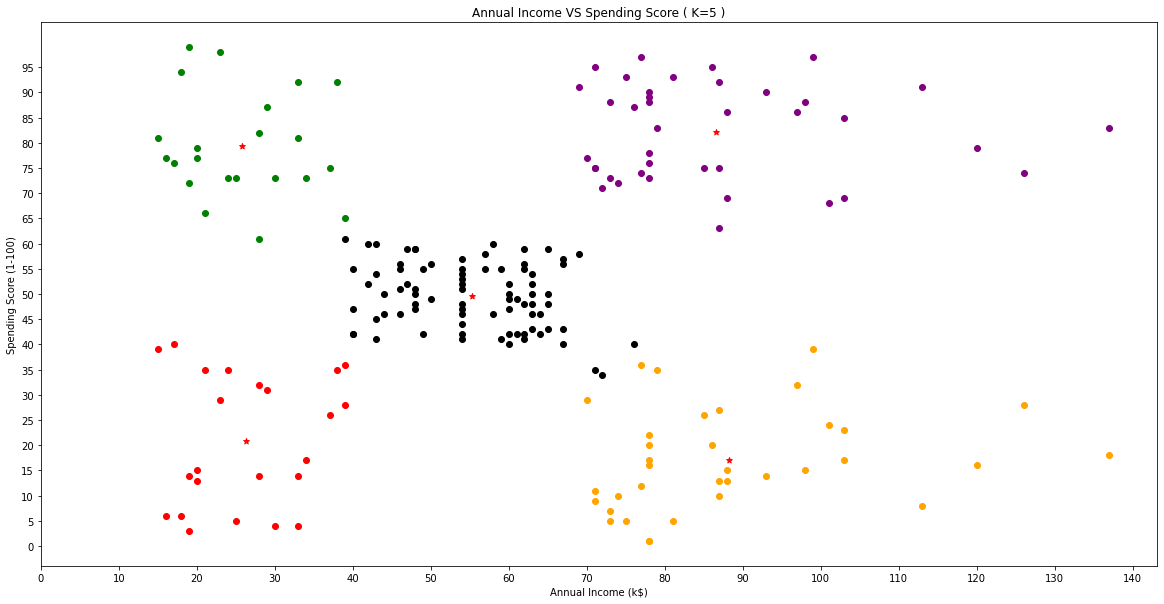

In [21]:
y = data_set.iloc[:,3:5]
y

km5 = KMeans(n_clusters=5)
predicted_clusters5 = km5.fit_predict(y)
predicted_clusters5

x5 = y
x5['Cluster'] = predicted_clusters5
x5

cluster_center5 = km5.cluster_centers_
cluster_center5

c50 = x5 [x5.Cluster == 0]
c51 = x5 [x5.Cluster == 1]
c52 = x5 [x5.Cluster == 2]
c53 = x5 [x5.Cluster == 3]
c54 = x5 [x5.Cluster == 4]


plt.figure(figsize=(20,10))
plt.scatter(c50['Annual Income (k$)'],c50['Spending Score (1-100)'],color ='red')
plt.scatter(cluster_center5[0][0],cluster_center5[0][1],color='r',marker='*',)
plt.scatter(c51['Annual Income (k$)'],c51['Spending Score (1-100)'],color ='purple')
plt.scatter(cluster_center5[1][0],cluster_center5[1][1],color='r',marker='*',)
plt.scatter(c52['Annual Income (k$)'],c52['Spending Score (1-100)'],color ='green')
plt.scatter(cluster_center5[2][0],cluster_center5[2][1],color='r',marker='*',)
plt.scatter(c53['Annual Income (k$)'],c53['Spending Score (1-100)'],color ='k')
plt.scatter(cluster_center5[3][0],cluster_center5[3][1],color='r',marker='*',)
plt.scatter(c54['Annual Income (k$)'],c54['Spending Score (1-100)'],color ='orange')
plt.scatter(cluster_center5[4][0],cluster_center5[4][1],color='r',marker='*',)
plt.title('Annual Income VS Spending Score ( K=5 )')
plt.xticks(range(0,150,10))
plt.yticks(range(0,100,5))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

$ for : k = 4$

[[26.30434783 20.91304348]
 [87.         18.63157895]
 [86.53846154 82.12820513]
 [48.26       56.48      ]]


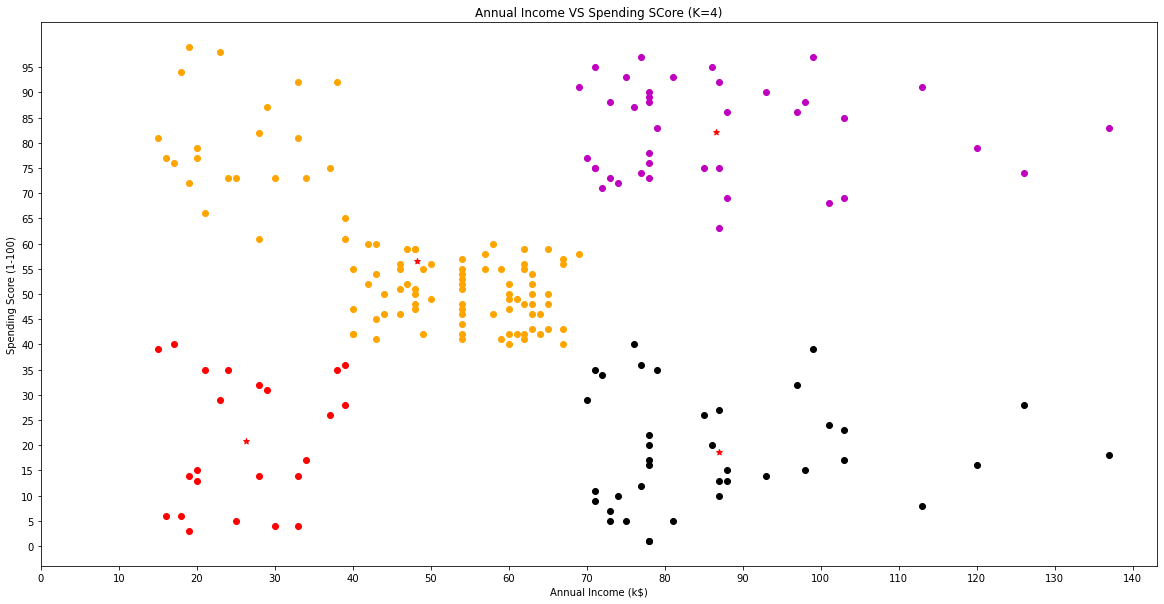

In [23]:
y = data_set.iloc[:,3:5]
y

km4 = KMeans(n_clusters=4)
predicted_clusters4 =   km4.fit_predict(y)
predicted_clusters4

cluster_center4 = km4.cluster_centers_
cluster_center4
print(cluster_center4)

x4 = y
x4['Cluster'] = predicted_clusters4
c40 = x4[x4.Cluster == 0]
c41 = x4[x4.Cluster == 1]
c42 = x4[x4.Cluster == 2]
c43 = x4[x4.Cluster == 3]


plt.figure(figsize=(20,10))
plt.scatter(c40['Annual Income (k$)'],c40['Spending Score (1-100)'],color = 'r')
plt.scatter(cluster_center4[0][0],cluster_center4[0][1],color='r',marker='*',)
plt.scatter(c41['Annual Income (k$)'],c41['Spending Score (1-100)'],color = 'k')
plt.scatter(cluster_center4[1][0],cluster_center4[1][1],color='r',marker='*',)
plt.scatter(c42['Annual Income (k$)'],c42['Spending Score (1-100)'],color = 'm')
plt.scatter(cluster_center4[2][0],cluster_center4[2][1],color='r',marker='*',)
plt.scatter(c43['Annual Income (k$)'],c43['Spending Score (1-100)'],color = 'orange')
plt.scatter(cluster_center4[3][0],cluster_center4[3][1],color='r',marker='*',)
plt.title('Annual Income VS Spending SCore (K=4)')
plt.xticks(range(0,150,10))
plt.yticks(range(0,100,5))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()